**Data Analytics I**

**A4.Create a Linear Regression Model using Python to predict
home prices using Boston Housing Dataset**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import Boston Housing Dataset**

In [12]:
from google.colab import files
files.upload()

Saving HousingData.csv to HousingData.csv


{'HousingData.csv': b'CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV\r\n0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\r\n0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\r\n0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\r\n0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\r\n0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,NA,36.2\r\n0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\r\n0.08829,12.5,7.87,NA,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\r\n0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\r\n0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\r\n0.17004,12.5,7.87,NA,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\r\n0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\r\n0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\r\n0.09378,12.5,7.87,0,0.524,5.889,39,5.4

In [13]:
df=pd.read_csv("/content/HousingData.csv")

In [14]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [15]:
df.shape

(506, 14)

In [16]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [18]:

df.describe(include="all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [19]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [21]:
df['CRIM']=df['CRIM'].fillna(df['CRIM'].mean())

In [22]:
df['ZN']=df['ZN'].fillna(df['ZN'].mean())

In [23]:
df['INDUS']=df['INDUS'].fillna(df['INDUS'].mean())

In [25]:
df['CHAS']=df['CHAS'].fillna(df['CHAS'].mean())

In [26]:
df['AGE']=df['AGE'].fillna(df['AGE'].mean())

In [27]:
df['LSTAT']=df['LSTAT'].fillna(df['LSTAT'].mean())

In [28]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

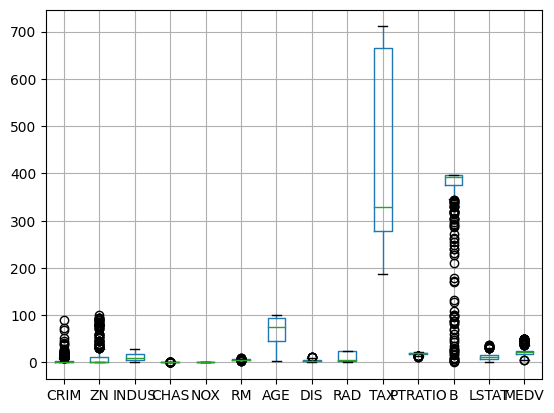

In [31]:
df.boxplot()

<Axes: >

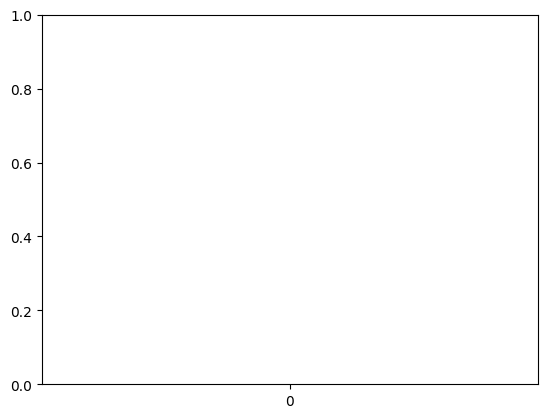

In [32]:
sns.boxplot()

<Axes: xlabel='CRIM'>

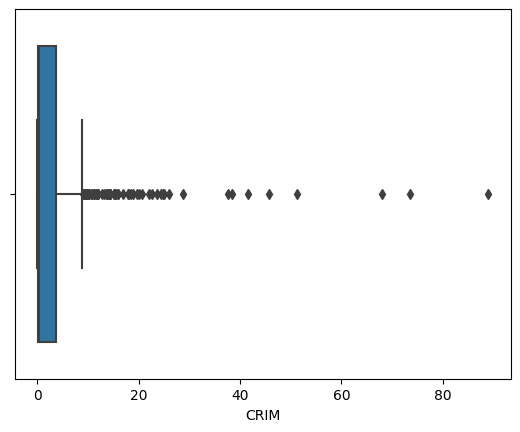

In [33]:
sns.boxplot(x=df.CRIM)

<Axes: xlabel='ZN'>

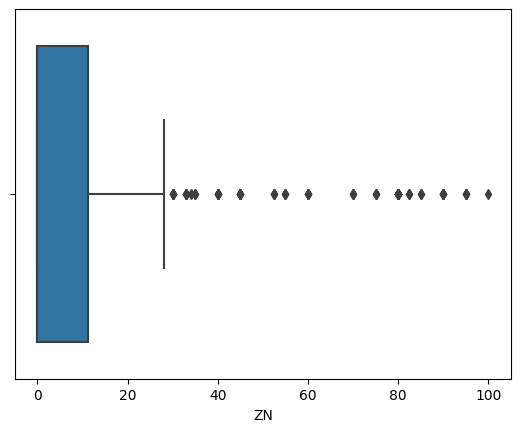

In [34]:
sns.boxplot(x=df.ZN)

<Axes: xlabel='CHAS'>

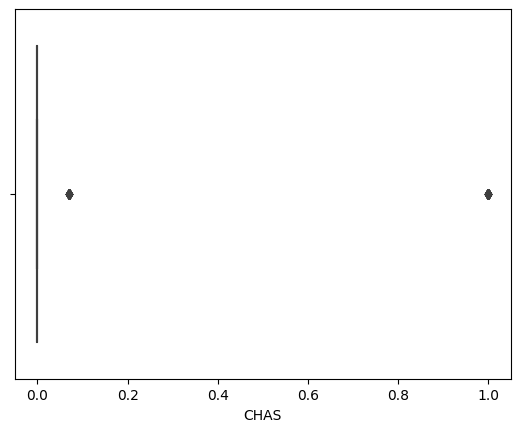

In [35]:
sns.boxplot(x=df.CHAS)

<Axes: xlabel='RM'>

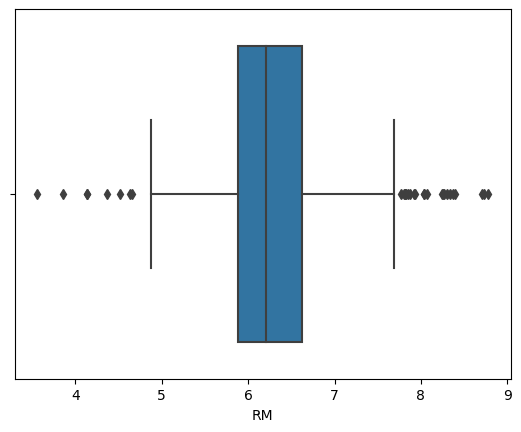

In [36]:
sns.boxplot(x=df.RM)

<Axes: xlabel='B'>

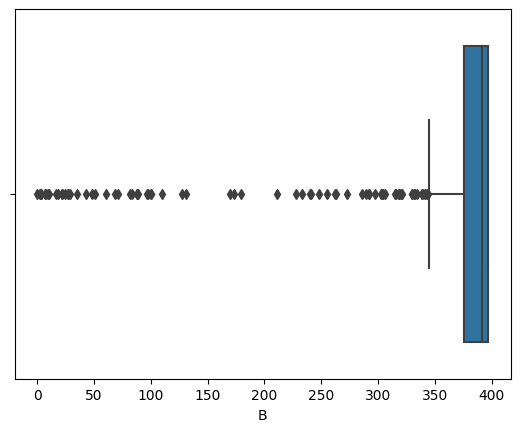

In [37]:
sns.boxplot(x=df.B)

<Axes: xlabel='MEDV'>

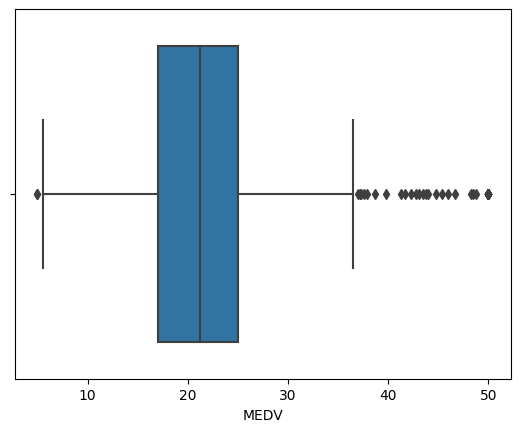

In [38]:
sns.boxplot(x=df.MEDV)

<Axes: xlabel='LSTAT'>

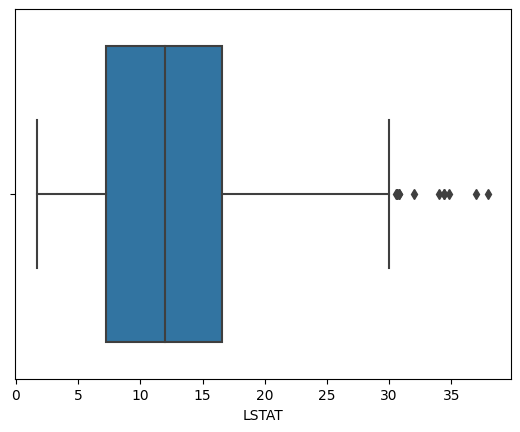

In [39]:
sns.boxplot(x=df.LSTAT)

In [55]:
x = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

KeyError: ignored

In [56]:
from sklearn.model_selection import train_test_split

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2,random_state = 0)

In [43]:
import sklearn
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()
model=lm.fit(xtrain, ytrain)

In [45]:
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

In [46]:
df=pd.DataFrame(ytrain_pred,ytrain)
df=pd.DataFrame(ytest_pred,ytest)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
mse = mean_squared_error(ytest, ytest_pred)
print(mse)

34.987389544238766


In [49]:
mse = mean_squared_error(ytrain_pred,ytrain)
print(mse)

20.019115913036586


In [50]:
mse = mean_squared_error(ytest, ytest_pred)
print(mse)

34.987389544238766


In [51]:
import numpy as np

In [52]:
np.sqrt(mse)

5.915013909048631

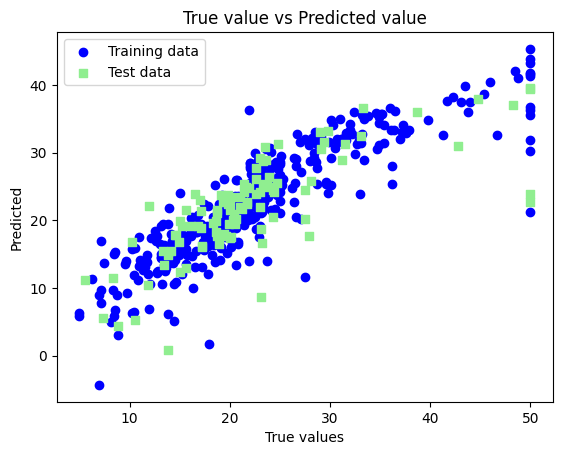

In [53]:
plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
#plt.hlines(y=0,xmin=0,xmax=50)
plt.plot()
plt.show()

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [63]:
x
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [66]:
import numpy as np

In [68]:
# model evaluation for training set
y_train_predict = lin_model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.733997588960905
R2 score is 0.7420299863537105


The model performance for testing set
--------------------------------------
RMSE is 5.0017668901941725
R2 score is 0.6588520195508143


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, 
ytest =train_test_split(x, y, test_size =0.2,random_state = 0)



In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)

In [74]:
print(f'Train Dataset Size - X: {X_train.shape}, Y: {Y_train.shape}')
print(f'Test Dataset Size - X: {X_test.shape}, Y: {Y_test.shape}')

Train Dataset Size - X: (354, 13), Y: (354,)
Test Dataset Size - X: (152, 13), Y: (152,)


In [75]:
# Model Building
lm = LinearRegression()
lm.fit(X_train,Y_train)
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Test vs Prediction')

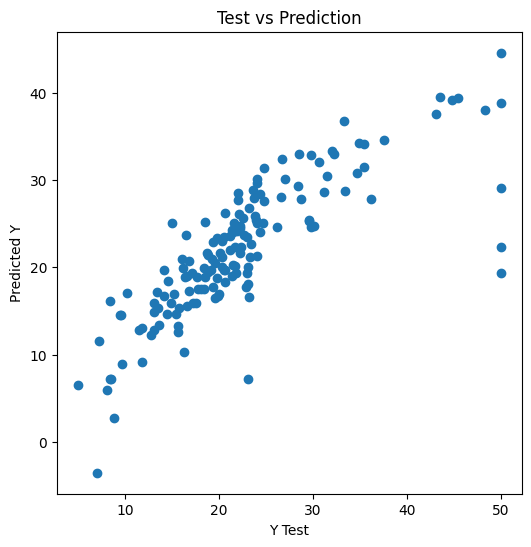

In [76]:
# Model Visualization
plt.figure(figsize=(6, 6))
plt.scatter(Y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Test vs Prediction')


Text(0.5, 1.0, 'Regression Line Tracing')

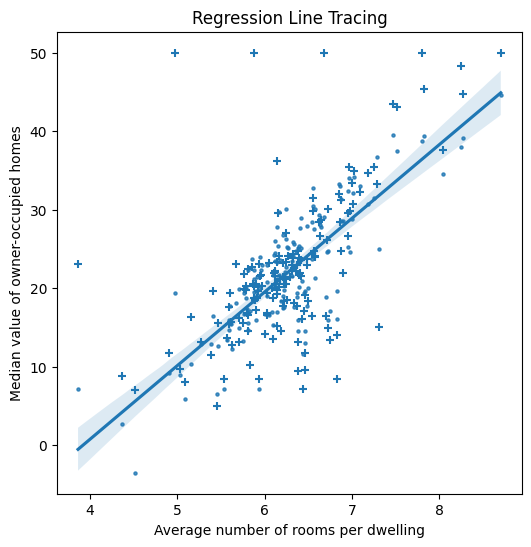

In [77]:
plt.figure(figsize=(6, 6))
sns.regplot(x = X_test['RM'], y = predictions, scatter_kws={'s':5})
plt.scatter(X_test['RM'], Y_test, marker = '+')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes')
plt.title('Regression Line Tracing')
